In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
import copy
from datetime import datetime
import json
import numpy as np
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union

import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = False

import ase
import ase.io as ase_io
from ase import Atoms
from ase.visualize import view

In [7]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
import constants as C
from dataset import Dataset
import datasets_collections as dc
import features as ft
import features_collections as fc
import utils as ut
import xyz_parser
import molecule_analyzer as A

In [8]:
molecules = au.create_ase_atoms_list_from_dataset(dc.mol24_crest_conformers)
features_list = fc.mol24_forbidden_bonds
features_info = [x.get_info(molecules[0]) for x in features_list]

calc_by_features = A.calculate_values_groupby_features(
                                      molecules=molecules,
                                      features_list=features_list
                                      )

calc_by_mols = A.calculate_values_groupby_molecules(
                                      molecules=molecules,
                                      features_list=features_list
                                      )


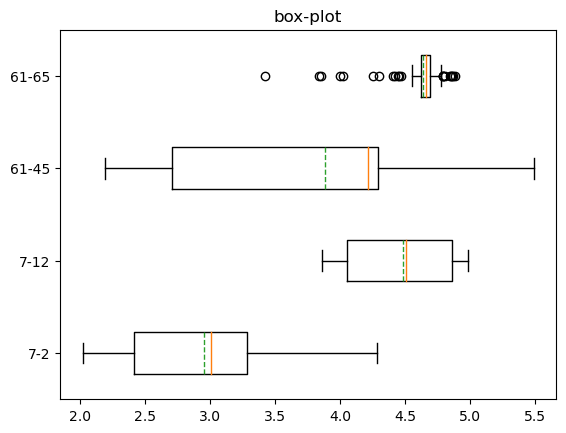

In [15]:
data = [x.values for x in calc_by_features]
labels = [x.name for x in calc_by_features]
user_medians = [np.mean(x) for x in data]

plt.title("box-plot")
plt.boxplot(
              data,
              labels=labels,
              showmeans=True,
              meanline=True,
              vert=False,
              #usermedians=user_medians,
            );



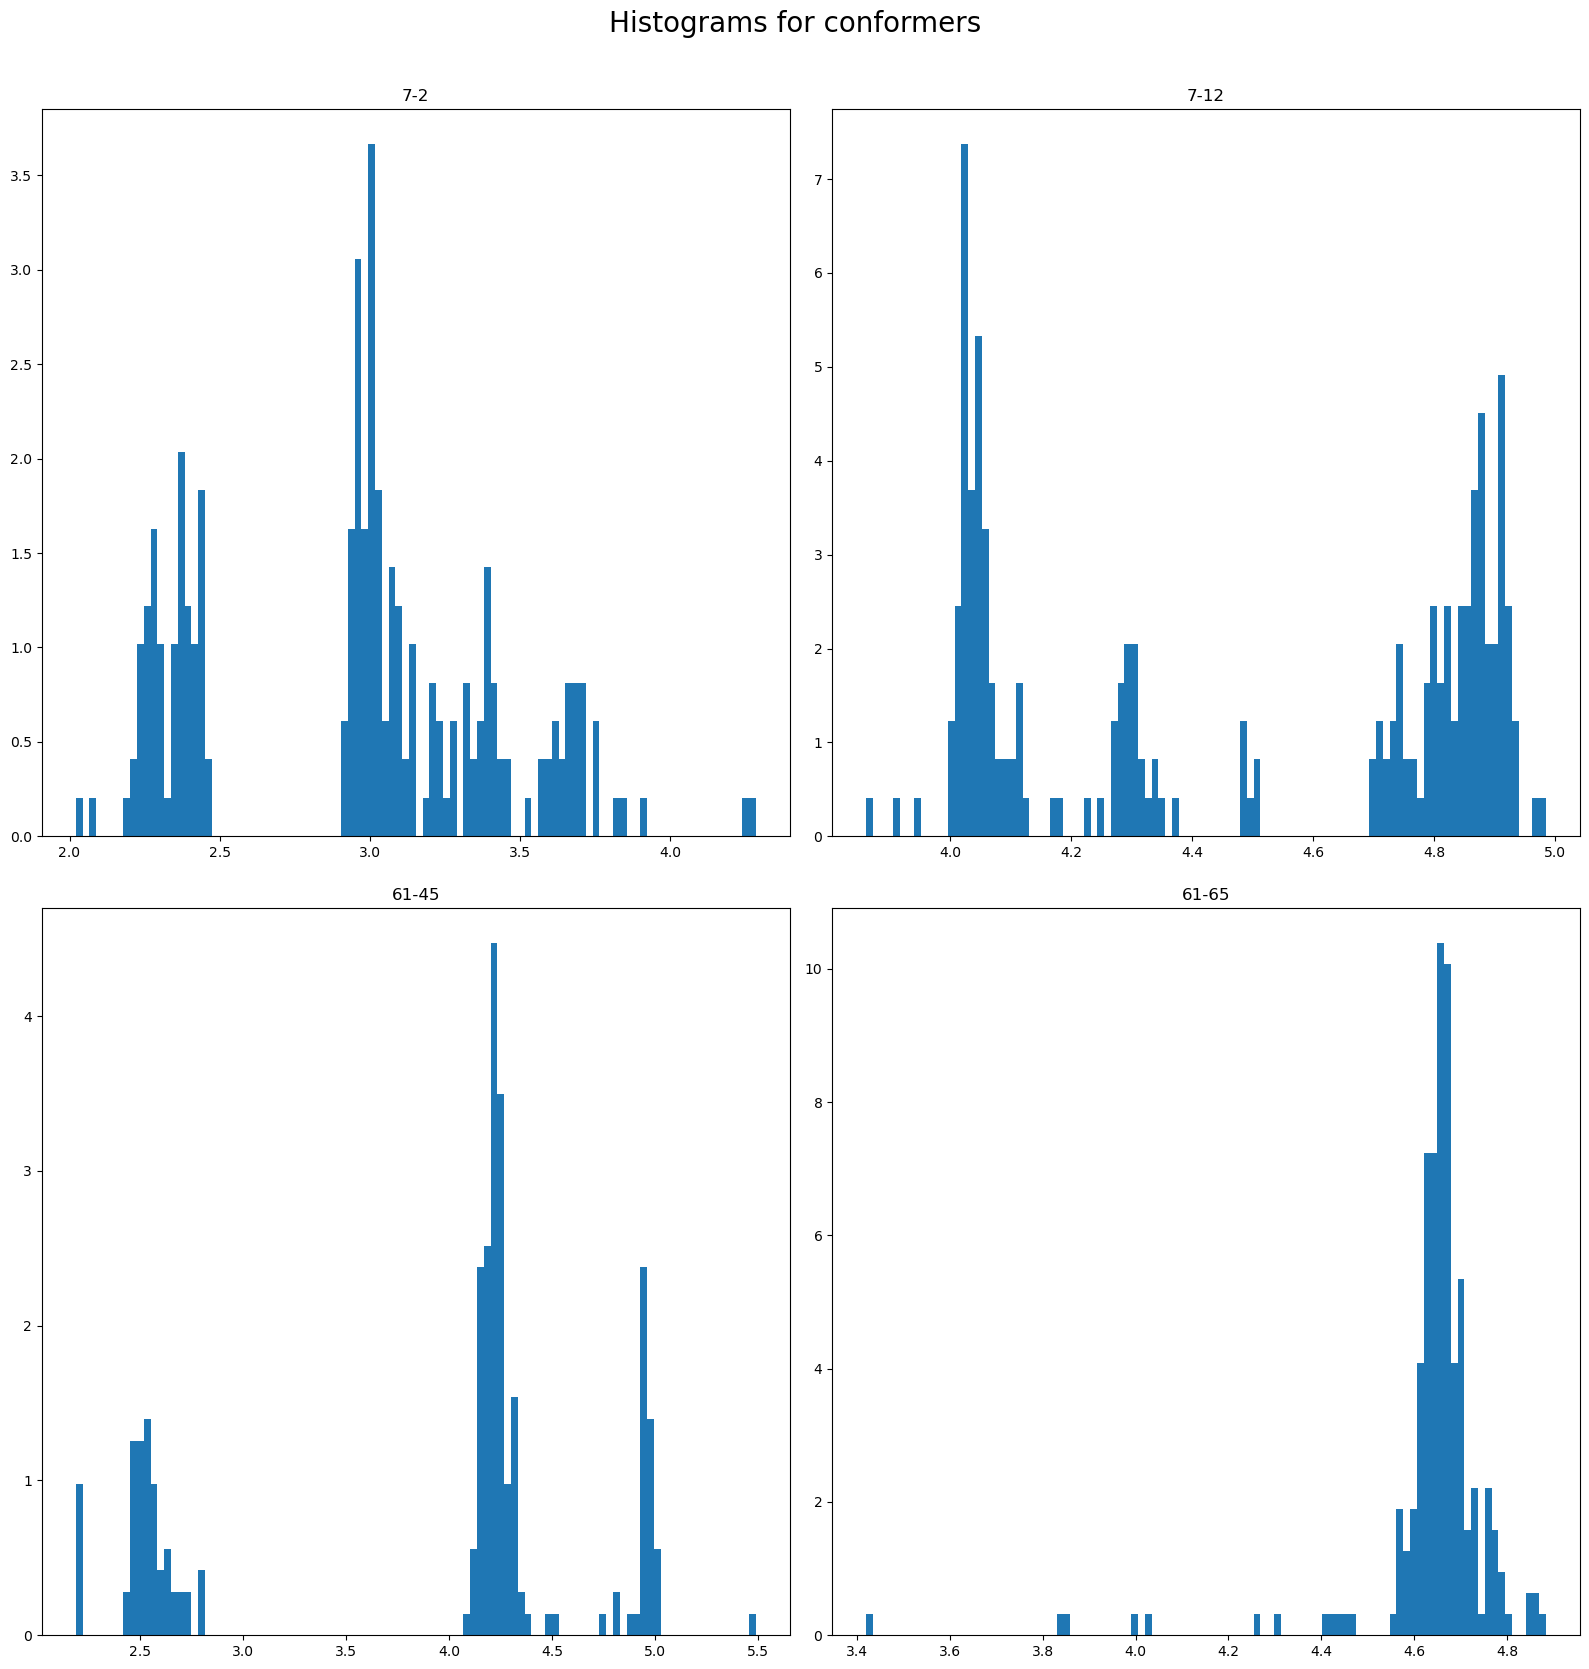

In [10]:
# https://www.kaggle.com/code/ambrosm/msci-eda-which-makes-sense
#_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

n = len(calc_by_features)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1

_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.hist(data.values, bins=100, density=True)
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle('Histograms for conformers', fontsize=20, y=1.04)
plt.show()


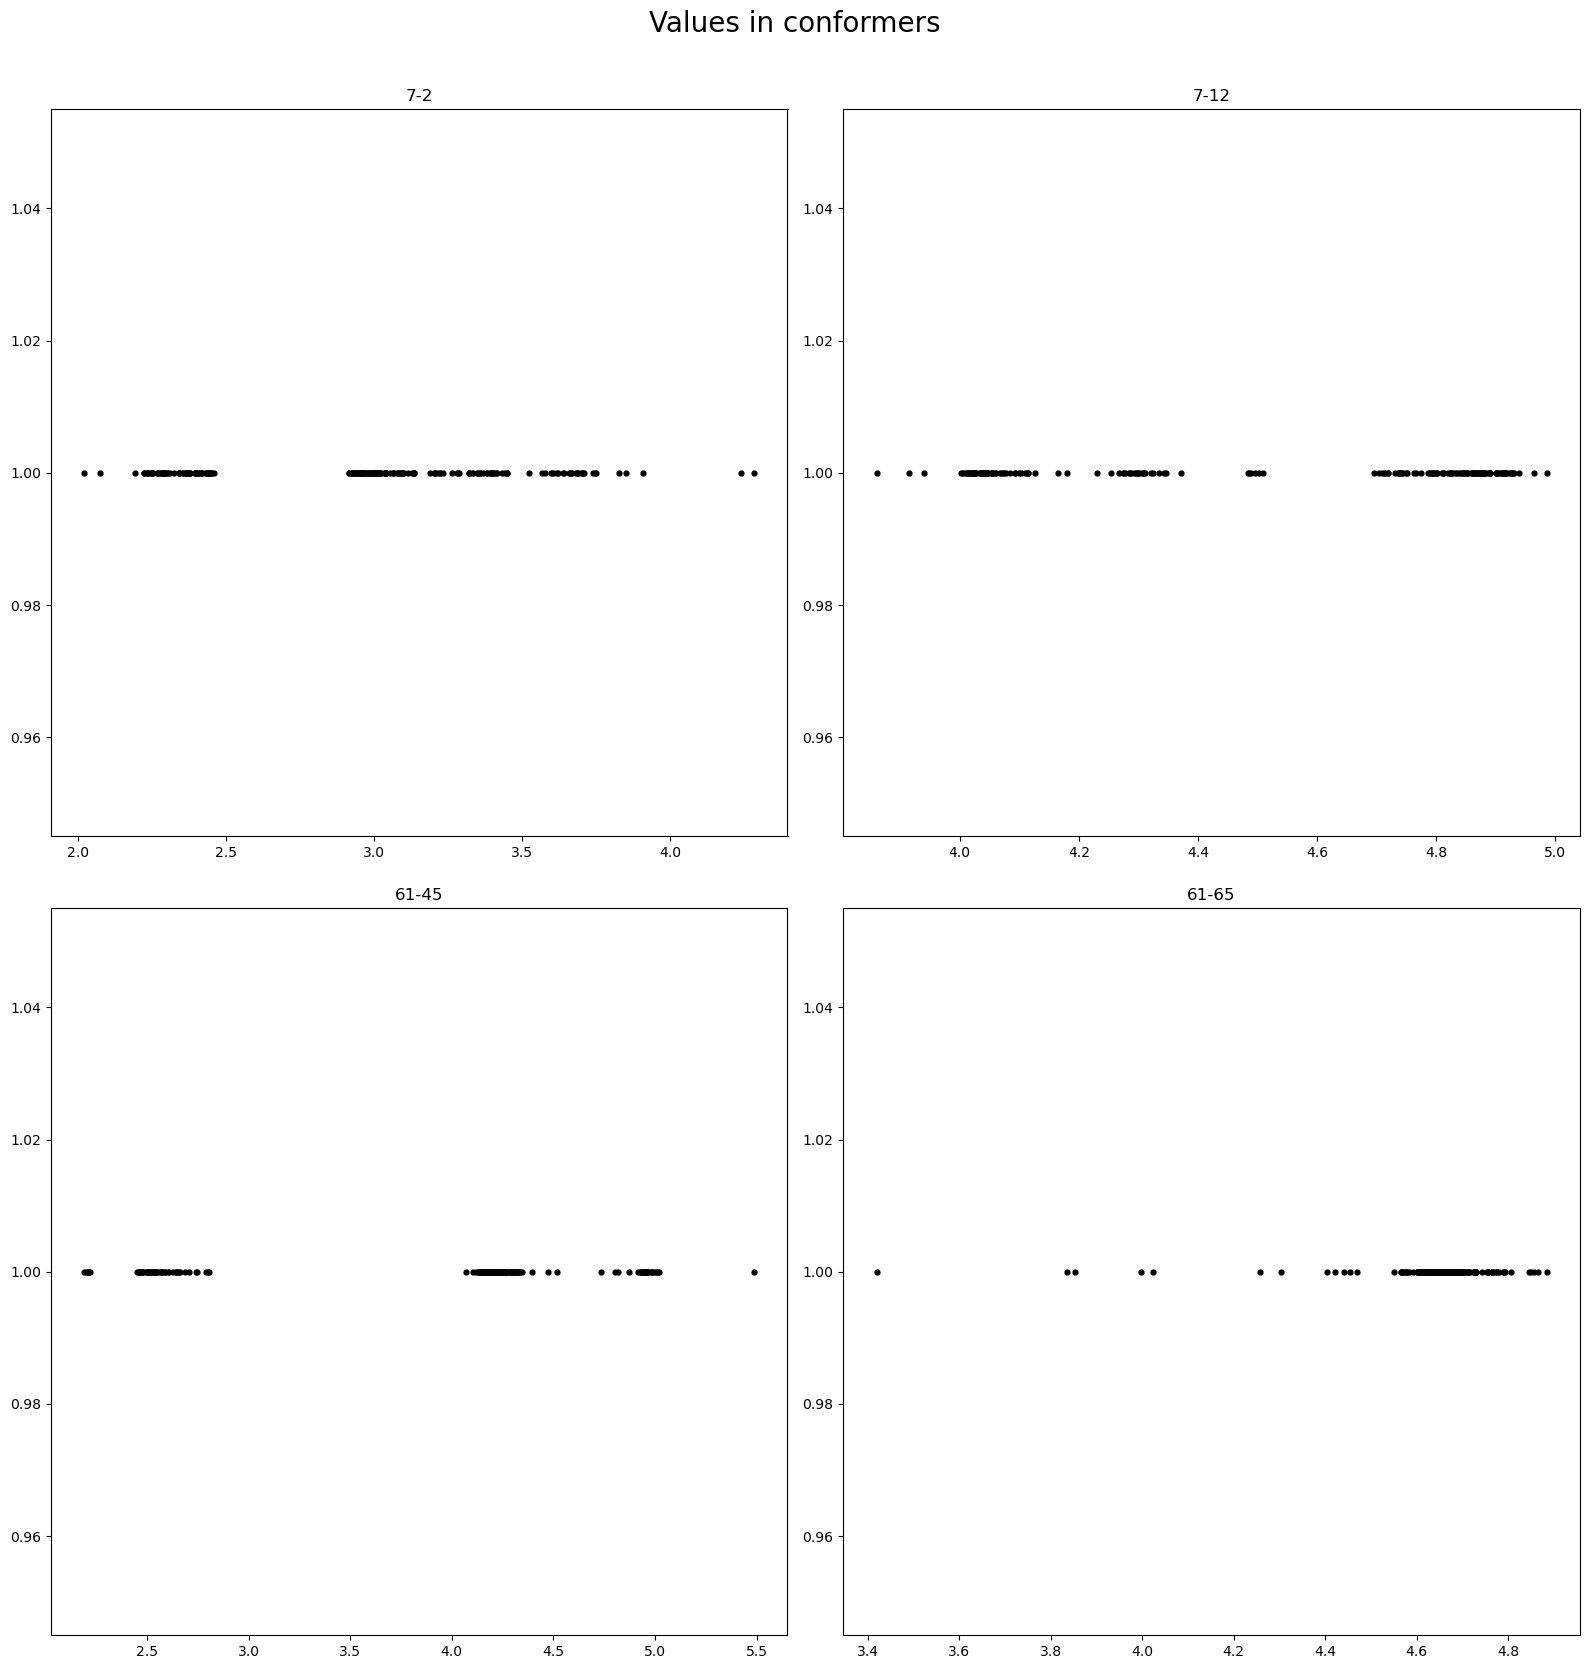

In [11]:
_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter(data.values, [1 for _ in data.values], s=12, c='black')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle('Values in conformers', fontsize=20, y=1.04)
plt.show()
